#### **Import Libraries**

In [39]:
import pandas as pd 
import textwrap
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns 
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-dark-palette')

/var/folders/3l/12mcyxkx38jdv4zv_hxngvtw0000gn/T/ipykernel_9452/1459744977.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


#### **Read in Data**

In [40]:
df = pd.read_csv("/Users/ppower1/Documents/GitHub/housing-and-homelessness/data/usa_00018.csv")

#### **Visualize Data**

In [41]:
df.head()

YEAR  SAMPLE  SERIAL       CBSERIAL  HHWT        CLUSTER  STRATA  GQ  \
0  2022  202201       1  2022010000031  69.0  2022000000011  280301   3   
1  2022  202201       2  2022010000111  22.0  2022000000021  200001   3   
2  2022  202201       3  2022010000200  45.0  2022000000031  280301   3   
3  2022  202201       4  2022010000261   4.0  2022000000041  110001   4   
4  2022  202201       5  2022010000296  47.0  2022000000051  150201   3   

   PERNUM  PERWT  FTOTINC  
0       1   69.0  9999999  
1       1   22.0  9999999  
2       1   45.0  9999999  
3       1    4.0  9999999  
4       1   47.0  9999999

#### **Clean Data**

In [52]:
condition = (df['FTOTINC'] == 9999998) | (df['FTOTINC'] == 9999999) | (df['FTOTINC'] <= 0)
df = df.drop(df[condition].index)
c1, c2, c3 = df['FTOTINC'].median()*.3, df['FTOTINC'].median()*.5, df['FTOTINC'].median()*.8

condition = df['FTOTINC'] > 2*df['FTOTINC'].median()
df = df.drop(df[condition].index)   

#### **Plot Data**

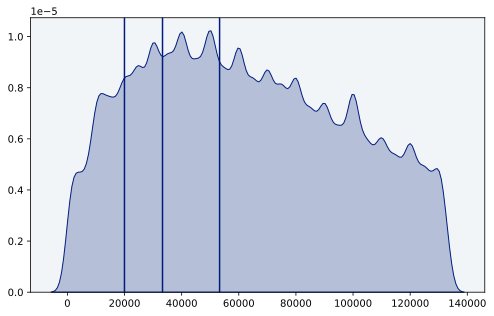

In [55]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
sns.kdeplot( df['FTOTINC'].values, fill=True, ax=ax)
plt.ylabel('')
ax.axvline(c1)
ax.axvline(c2)
ax.axvline(c3)
plt.show()